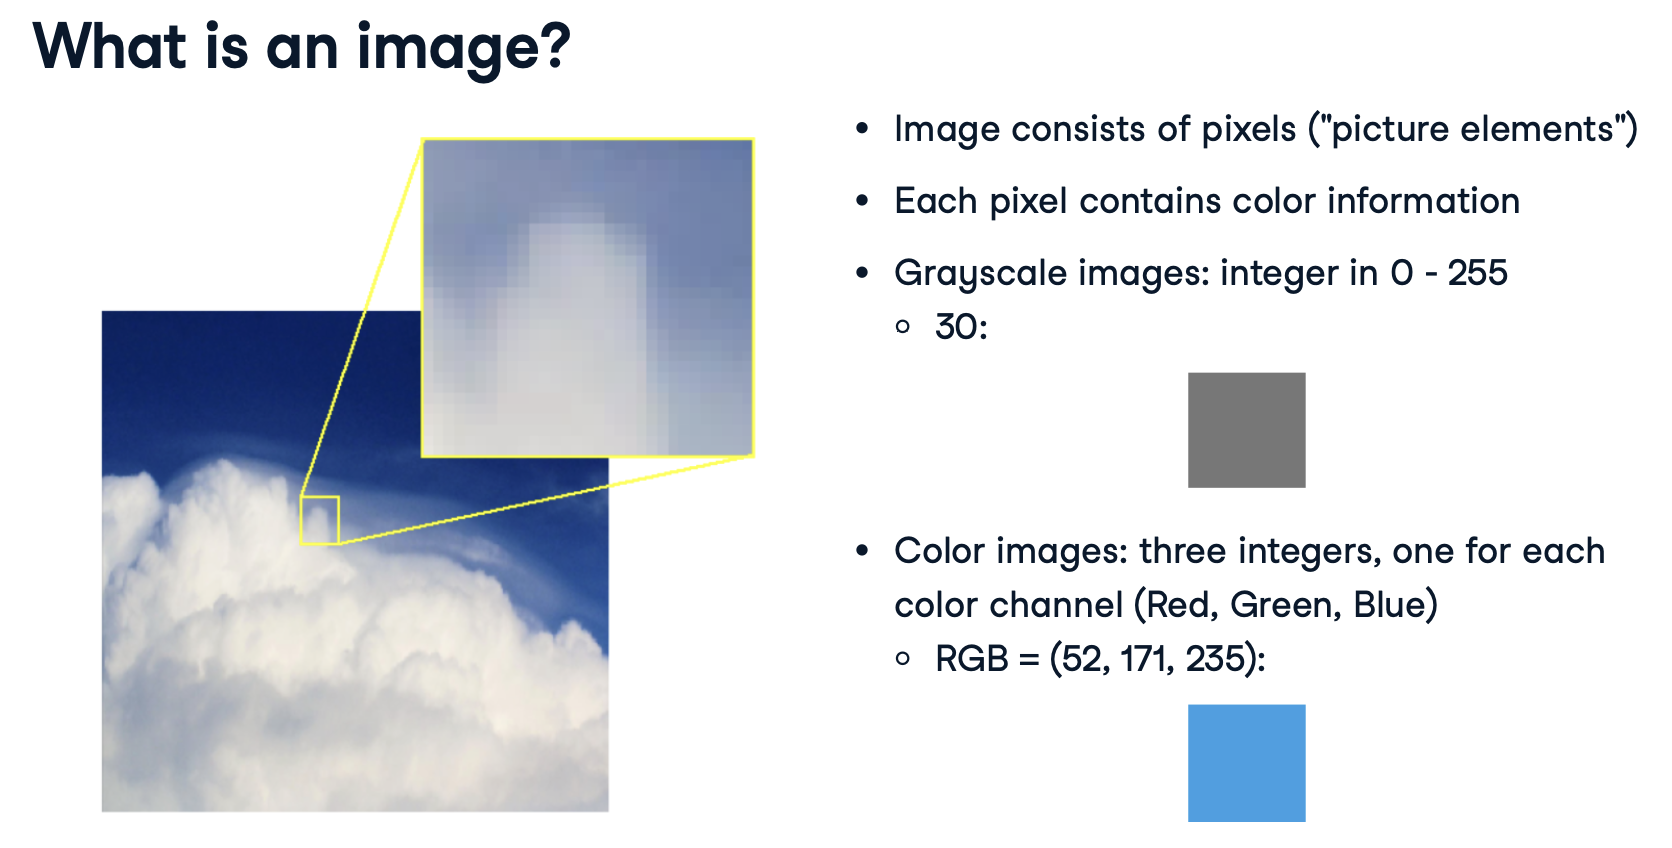

### Loading Images to PyTorch

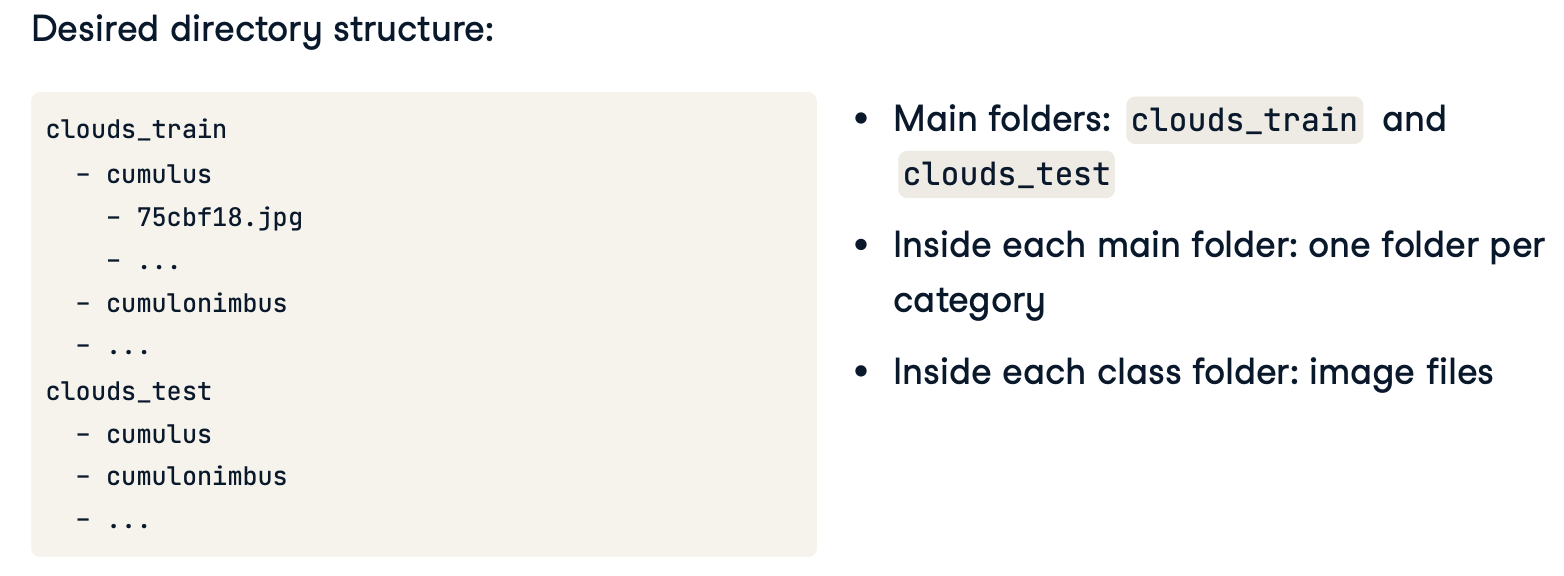

In [1]:
rm -r clouds/clouds_train/.ipynb_checkpoints

rm: clouds/clouds_train/.ipynb_checkpoints: No such file or directory


In [2]:
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms

train_transforms = transforms.Compose([    
    transforms.ToTensor(),    
    transforms.Resize((128, 128)),
])

dataset_train = ImageFolder("clouds/clouds_train", transform=train_transforms,)

Define transformations:
- Parse to tensor
- Resize to 128×128

Create dataset passing:
- Path to data
- Predefined transformations

In [3]:
from torch.utils.data import DataLoader

dataloader_train = DataLoader(    
    dataset_train,    
    shuffle=True,    
    batch_size=1,)

image, label = next(iter(dataloader_train))

print(image.shape)

torch.Size([1, 3, 128, 128])


In [4]:
image = image.squeeze().permute(1, 2, 0)
print(image.shape)

torch.Size([128, 128, 3])


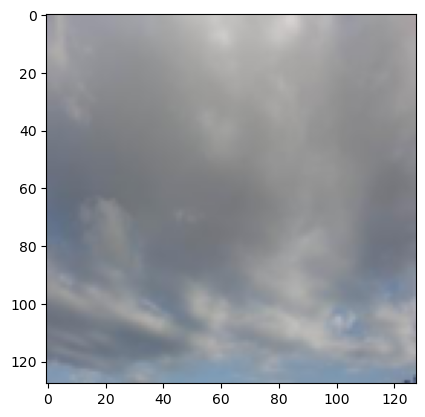

In [5]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.show()

In [6]:
train_transforms = transforms.Compose([    
    transforms.RandomHorizontalFlip(),    
    transforms.RandomRotation(45),    
    transforms.ToTensor(),    
    transforms.Resize((128, 128)),
])

dataset_train = ImageFolder("clouds/clouds_train", transform=train_transforms,)

**Data augmentation**: Generating more data by applying random transformations to original images
- Increase the size and diversity of the training set
- Improve model robustness
- Reduce overfitting

In [7]:
# training ver 1

# Compose transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((128, 128)),
])

# Create Dataset using ImageFolder
dataset_train = ImageFolder(
    "clouds/clouds_train",
    transform=train_transforms,
)

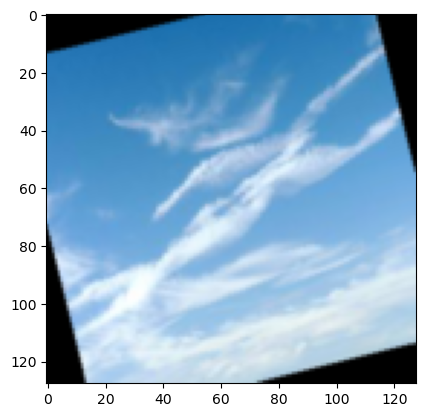

In [8]:
# training ver 2 (Data Augmentation)

train_transforms = transforms.Compose([
    # Add horizontal flip and rotation
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.ToTensor(),
    transforms.Resize((128, 128)),
])

dataset_train = ImageFolder(
  "clouds/clouds_train",
  transform=train_transforms,
)

dataloader_train = DataLoader(
  dataset_train, shuffle=True, batch_size=1
)

image, label = next(iter(dataloader_train))
# Reshape the image tensor
image = image.squeeze().permute(1, 2, 0)
# Display the image
plt.imshow(image)
plt.show()

### Convolutional Neural Networks (CNN)

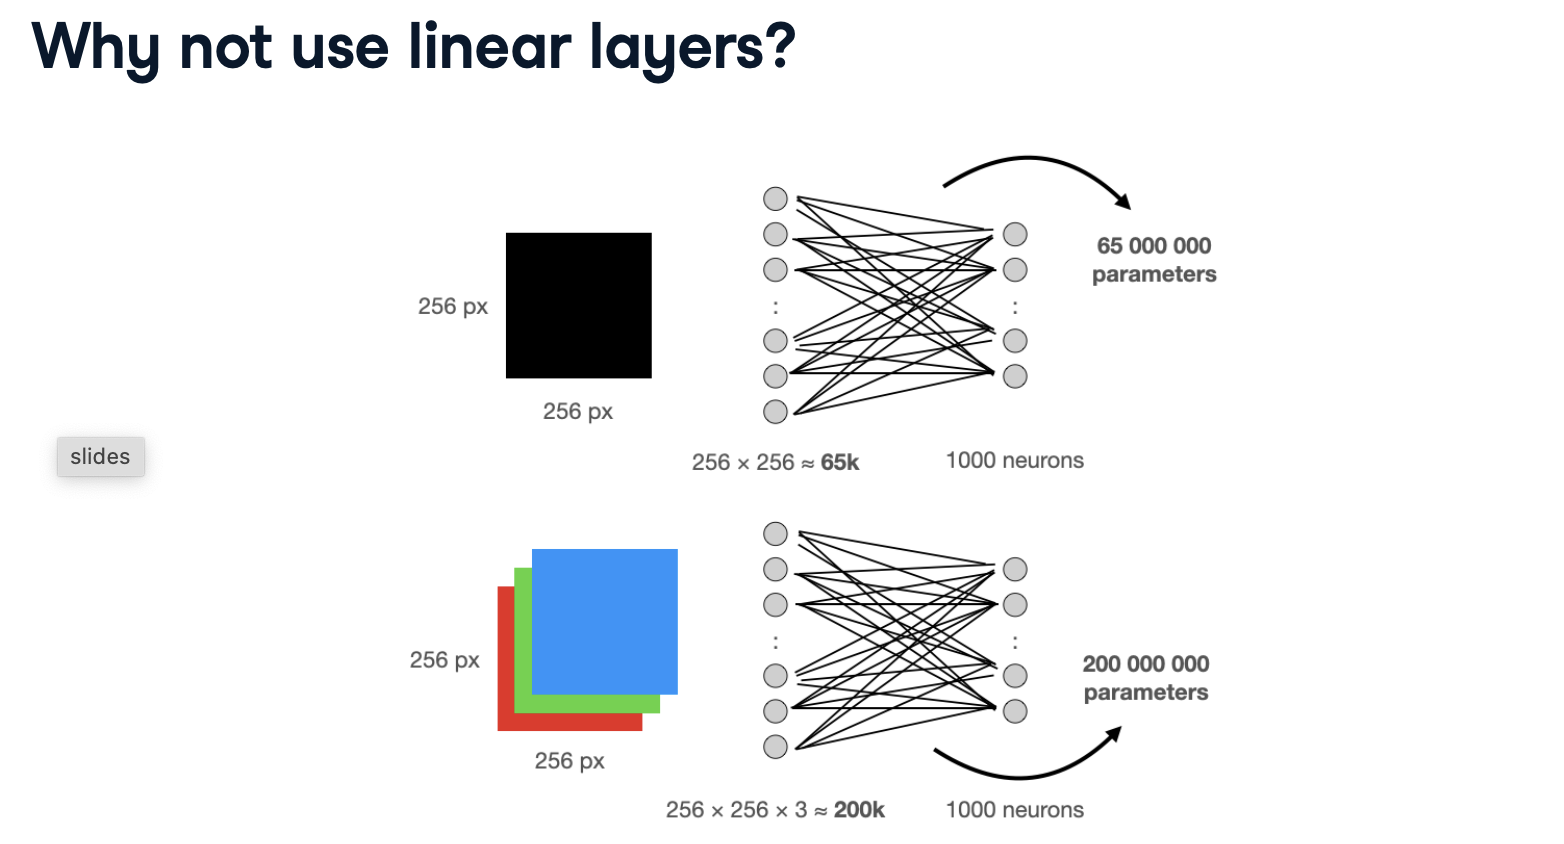

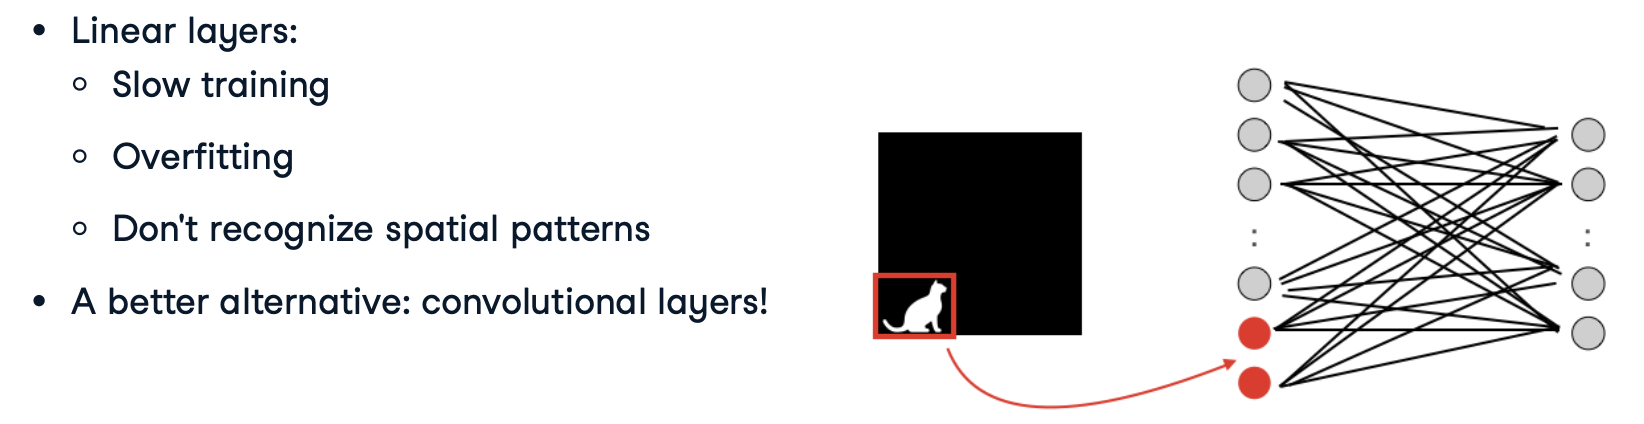

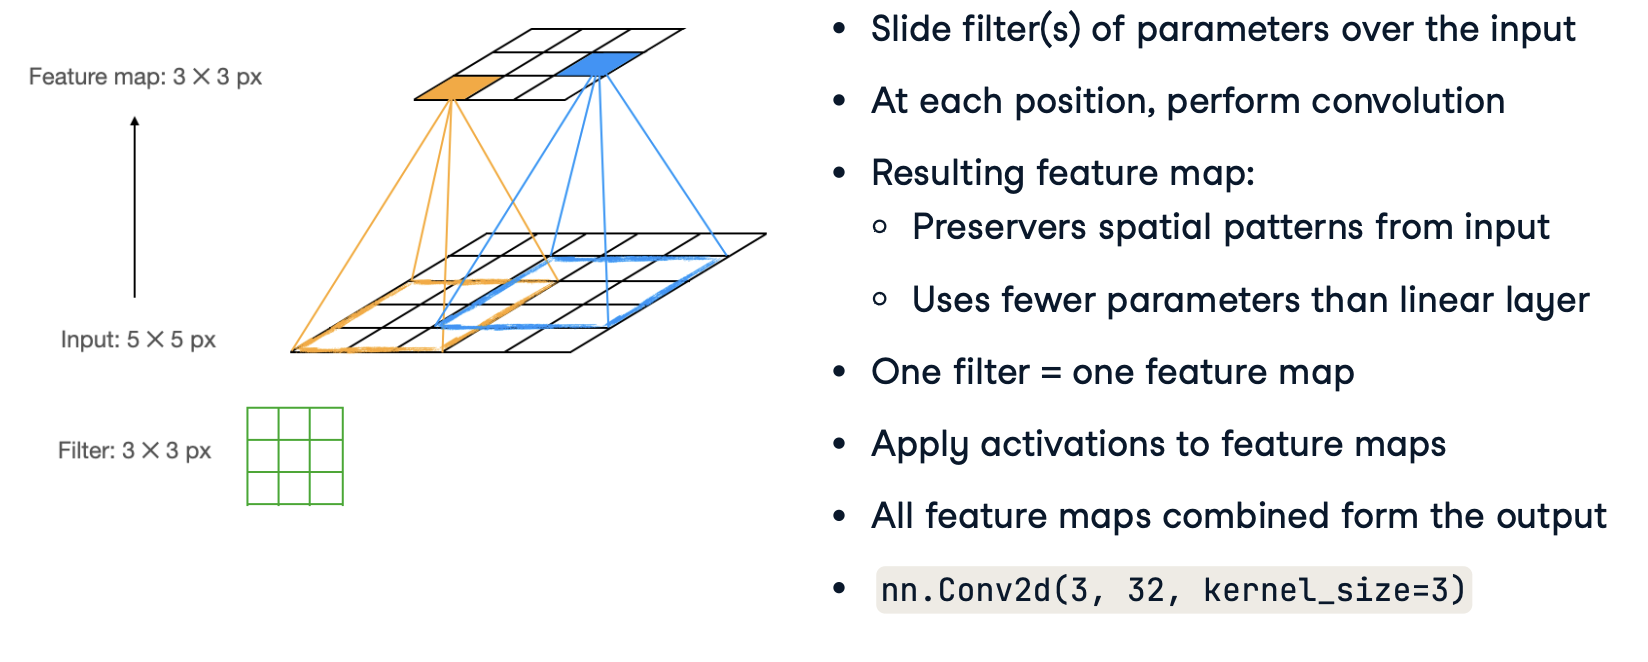

### Convolution

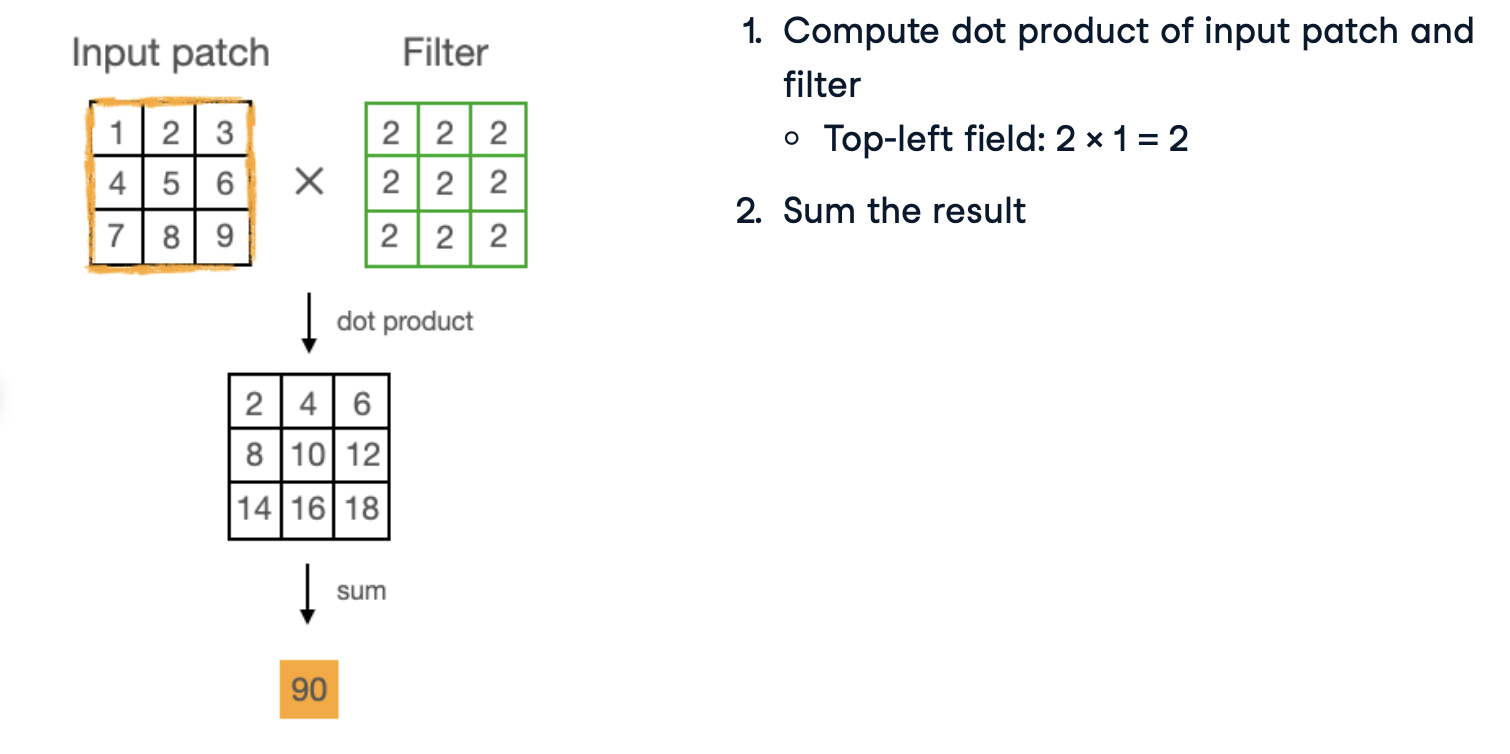

### Zero-padding

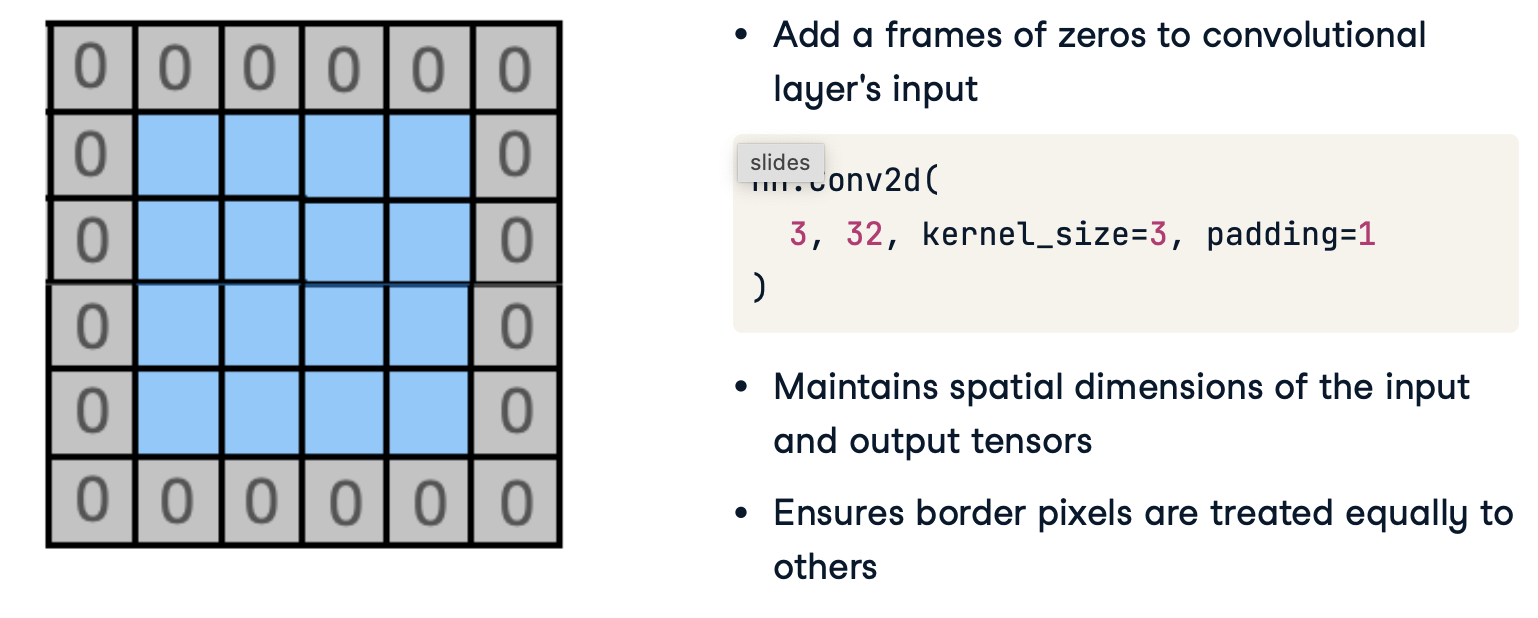

### Max Pooling

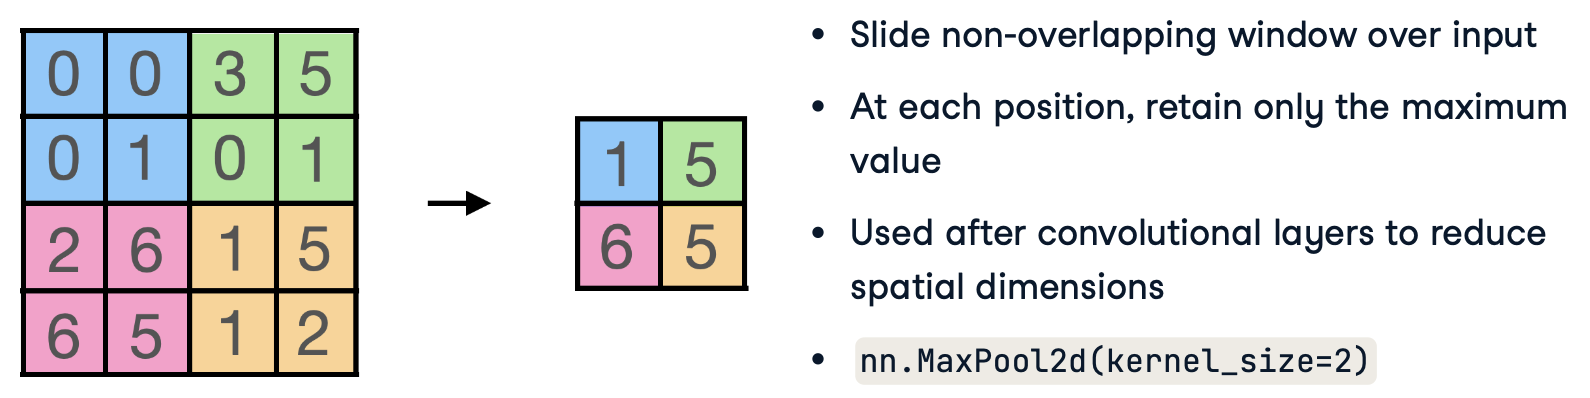

In [9]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, num_classes):
        super().__init__()        
        self.feature_extractor = nn.Sequential(            
            nn.Conv2d(3, 32, kernel_size=3, padding=1),            
            nn.ELU(),            
            nn.MaxPool2d(kernel_size=2),            
            nn.Conv2d(32, 64, kernel_size=3, padding=1),            
            nn.ELU(),            
            nn.MaxPool2d(kernel_size=2),            
            nn.Flatten(),        
        )        
        self.classifier = nn.Linear(64*16*16, num_classes)
        
    def forward(self, x):          
        x = self.feature_extractor(x)        
        x = self.classifier(x)
        
        return x

- `feature_extractor`: (convolution,activation, pooling), repeated twice and flattened
- `classifier`: single linear layer
- `forward()`: pass input image throughfeature extractor and classifier

### Feature Extractor Output Size

In [11]:
# self.feature_extractor = nn.Sequential(  
#     nn.Conv2d(3, 32, kernel_size=3, padding=1),  
#     nn.ELU(),  
#     nn.MaxPool2d(kernel_size=2),  
#     nn.Conv2d(32, 64, kernel_size=3, padding=1),  
#     nn.ELU(),  
#     nn.MaxPool2d(kernel_size=2),  
#     nn.Flatten(),
# )

# self.classifier = nn.Linear(64*16*16, num_classes)

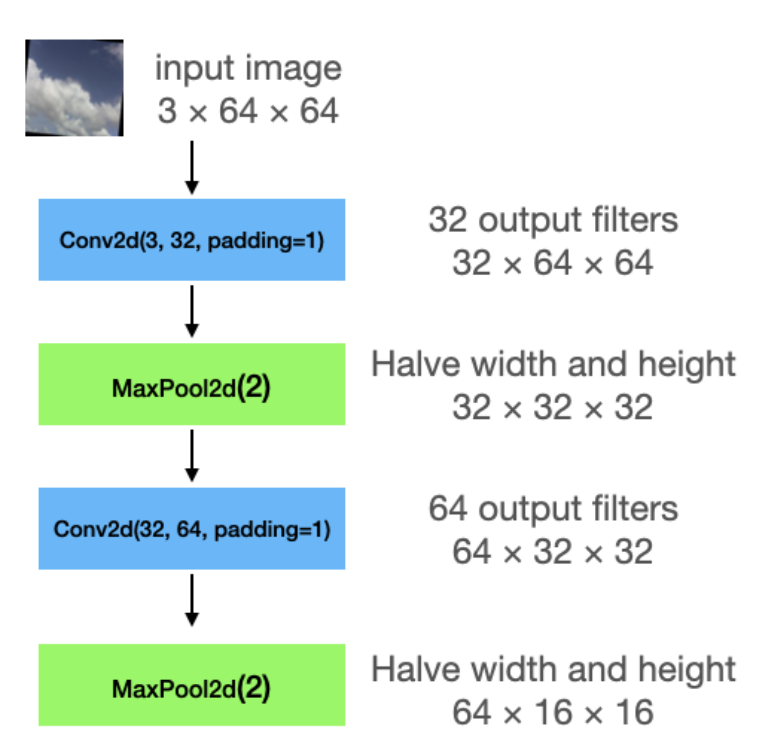

In [12]:
# training ver 3

class Net(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        # Define feature extractor
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
        )
        # Define classifier
        self.classifier = nn.Linear(64*16*16, num_classes)
    
    def forward(self, x):  
        # Pass input through feature extractor and classifier
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x

### Training Image Classifiers

### Data Augmentation Revisited

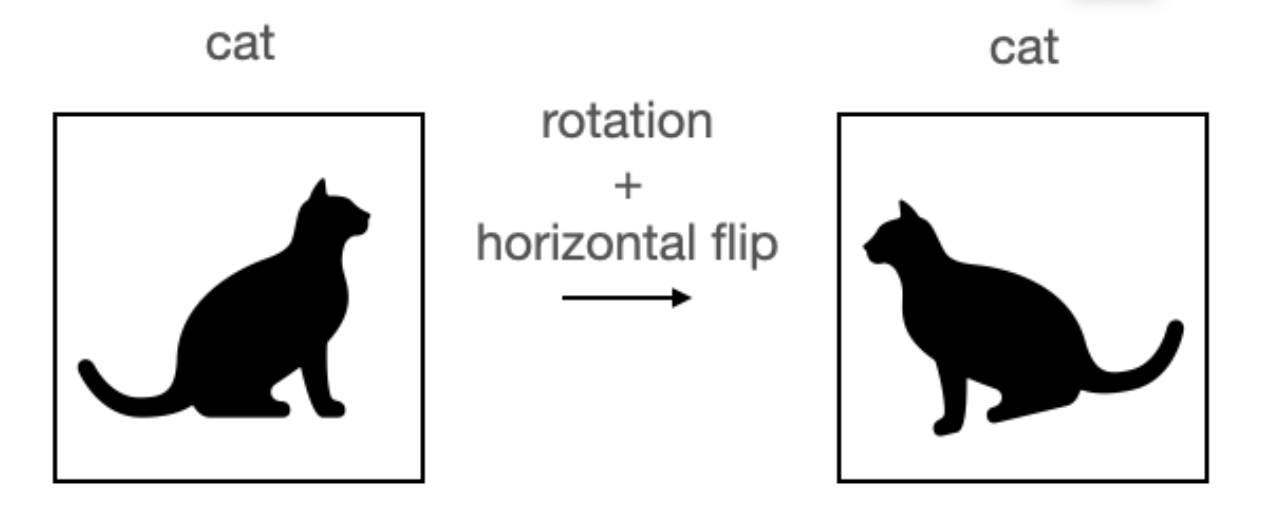

### What should not be augmented

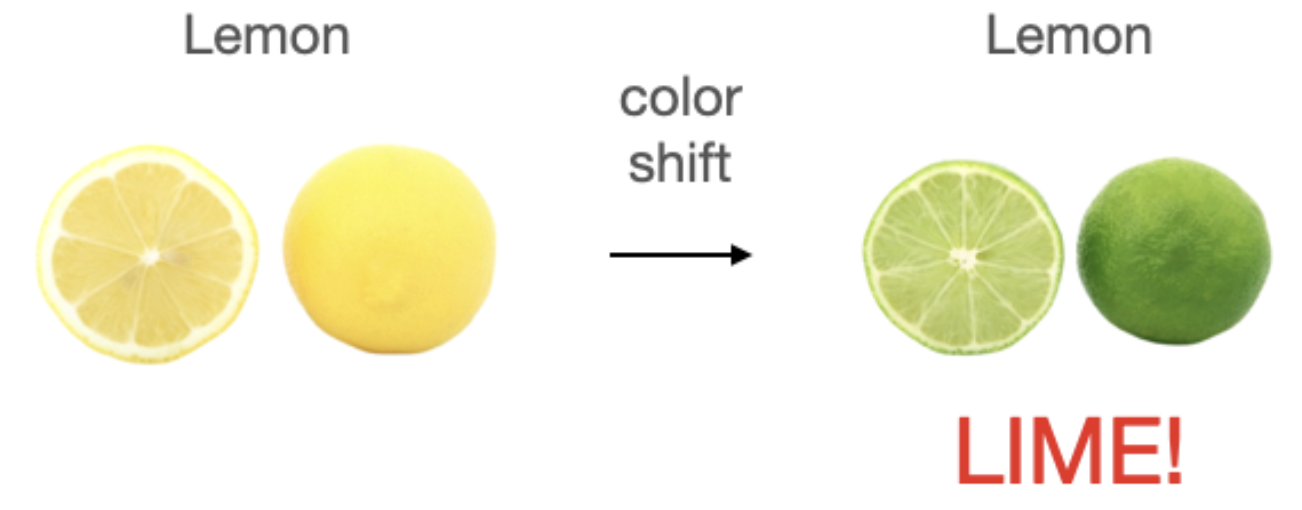

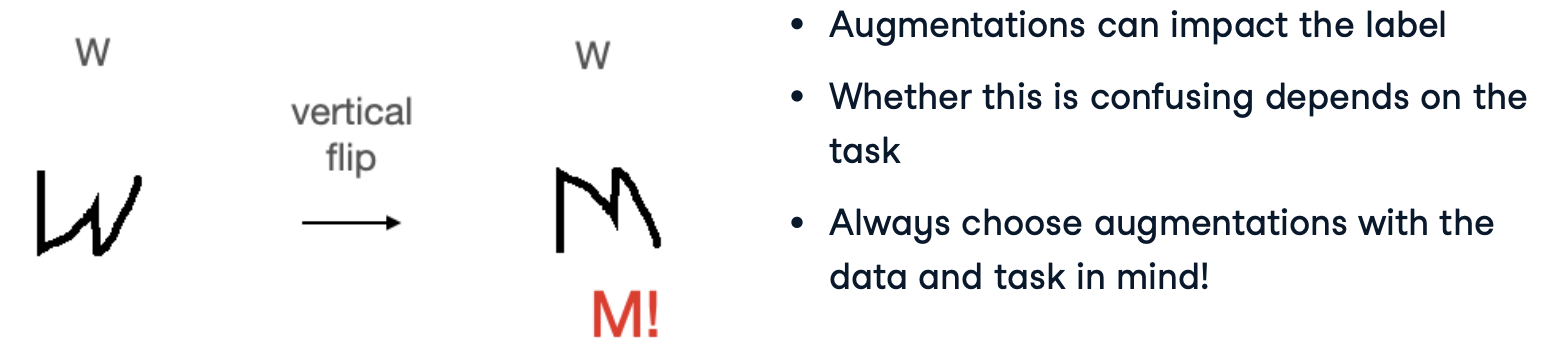

### Augmentations for Cloud Classification

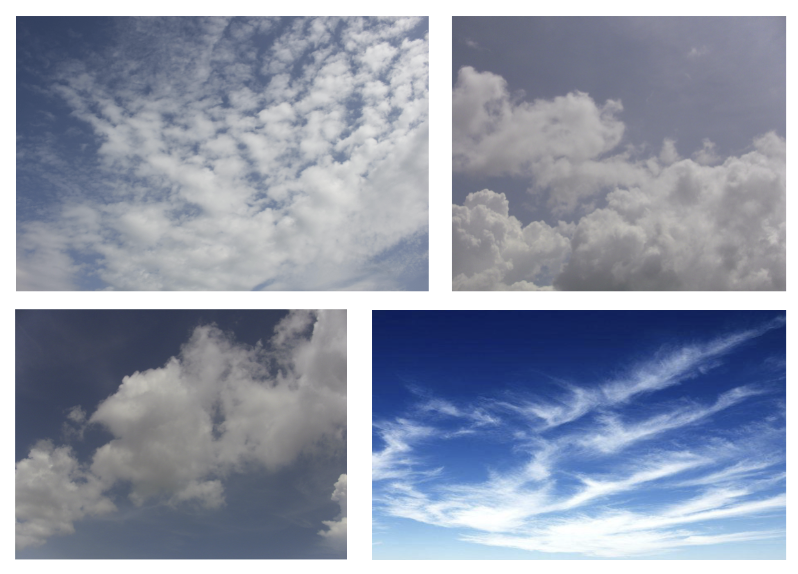

- **Random rotation**: expose model to different angles of cloud formations
- **Horizontal flip**: simulate different view points of the sky
- **Auto contrast adjustment**: simulate different lighting conditions

In [13]:
train_transforms = transforms.Compose([    
    transforms.RandomHorizontalFlip(),    
    transforms.RandomRotation(45),    
    transforms.RandomAutocontrast(),    
    transforms.ToTensor(),    
    transforms.Resize((128, 128))
])

### Cross-Entropy loss

- **Binary classification**: binary cross-entropy (BCE) loss
- **Multi-class classification**: cross-entropy loss
- `criterion = nn.CrossEntropyLoss()`

### Image Classifier Training Loop

In [17]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        # Feature extractor
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),  # 128 -> 64
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),  # 64 -> 32
            nn.Flatten(),
        )
        # 64 channels × 32 × 32 = 65536
        self.classifier = nn.Linear(64 * 32 * 32, num_classes)
    
    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x

In [16]:
import torch.optim as optim

net = Net(num_classes=7)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(10):
    for images, labels in dataloader_train:        
        optimizer.zero_grad()        
        outputs = net(images)        
        loss = criterion(outputs, labels)        
        loss.backward()        
        optimizer.step()

In [19]:
# num_epochs = 10

# for epoch in range(num_epochs):
#     running_loss = 0.0
#     print(f"\nEpoch {epoch+1}/{num_epochs}")
#     print("-" * 30)

#     for batch_idx, (images, labels) in enumerate(dataloader_train):
#         optimizer.zero_grad()
#         outputs = net(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()

#         print(f"  Batch {batch_idx+1:03d}: Loss = {loss.item():.4f}")

#     avg_loss = running_loss / len(dataloader_train)
#     print(f"Epoch {epoch+1} finished. Average Loss = {avg_loss:.4f}")

In [21]:
# training ver 3

# Define transforms
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.RandomAutocontrast(),
    transforms.ToTensor(),
    transforms.Resize((128, 128)),
])

dataset_train = ImageFolder(
  "clouds/clouds_train",
  transform=train_transforms,
)
dataloader_train = DataLoader(
  dataset_train, shuffle=True, batch_size=16
)

In [22]:
# training ver 4

# Define the model
net = Net(num_classes=7)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(3):
    running_loss = 0.0
    # Iterate over training batches
    for images, labels in dataloader_train:
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(dataloader_train)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

Epoch 1, Loss: 2.6535
Epoch 2, Loss: 1.5759
Epoch 3, Loss: 1.5397


### Evaluating Image Classifiers

In [32]:
# Data Augmentation for Test Data

!rm -r clouds/clouds_test/.ipynb_checkpoints

test_transforms = transforms.Compose([
    #
    # NO DATA AUGMENTATION AT TEST TIME
    #    
    transforms.ToTensor(),    
    transforms.Resize((128, 128)),

])

dataset_test = ImageFolder("clouds/clouds_test",transform=test_transforms,)

rm: clouds/clouds_test/.ipynb_checkpoints: No such file or directory


### Precision & Recall: binary classification

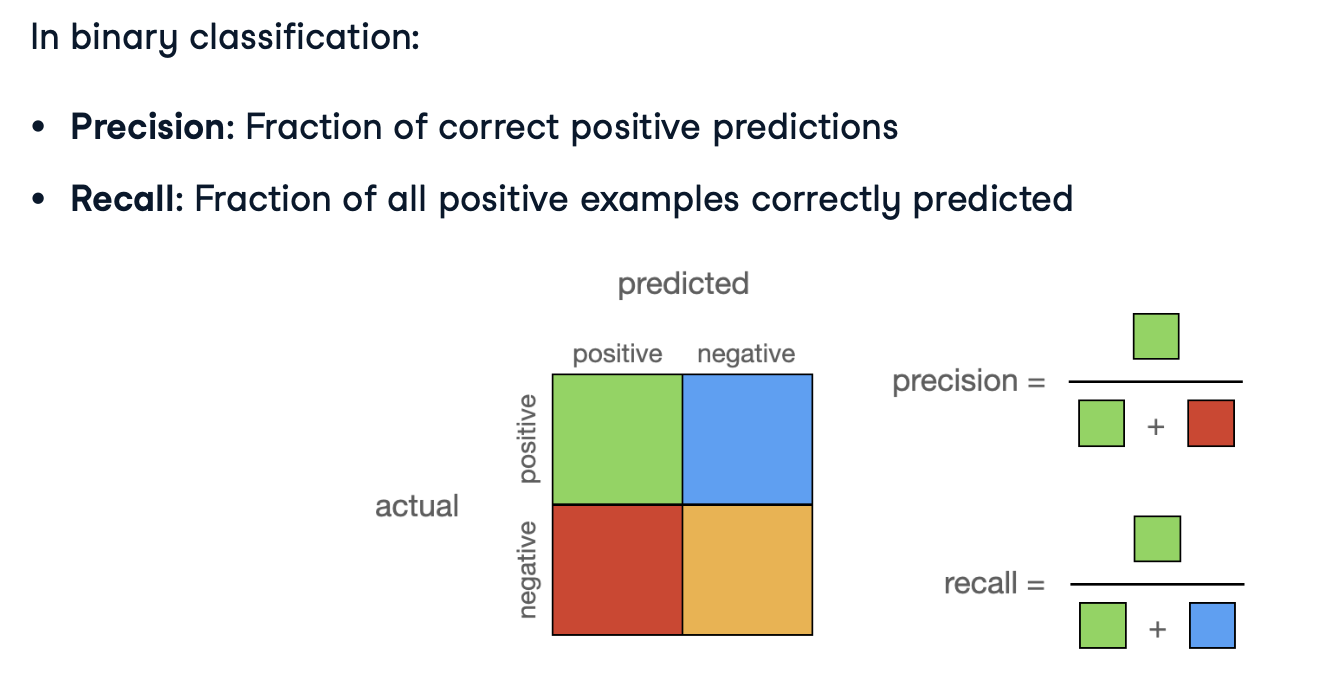

In multi-class classification: separate precision and recall for each class
- Precision: Fraction of cumulus-predictions that were correct
- Recall: Fraction of all cumulus examples correctly predicted

### Averaging Multi-Class Metrics

- With 7 classes, we have 7 precision and 7 recall scores
- We can analyze them per-class, or aggregate:
  - Micro average: global calculation
  - Macro average: mean of per-class metrics
  - Weighted average: weighted mean of per-class metrics

In [33]:
from torchmetrics import Recall

recall_per_class = Recall(task="multiclass", num_classes=7, average=None)
recall_micro = Recall(task="multiclass", num_classes=7, average="micro")
recall_macro = Recall(task="multiclass", num_classes=7, average="macro")
recall_weighted = Recall(task="multiclass", num_classes=7, average="weighted")

When to use each:
- Micro: Imbalanced datasets
- Macro: Care about performance on small classes
- Weighted: Consider errors in larger classes as more important

### Evaluation Loop

In [34]:
from torchmetrics import Precision, Recall

dataloader_test = DataLoader(
    dataset_test,
    batch_size=32,        
    shuffle=False,        
    num_workers=2         
)

metric_precision = Precision(  
    task="multiclass", 
    num_classes=7, 
    average="macro"
)

metric_recall = Recall(  
    task="multiclass", 
    num_classes=7, 
    average="macro"
)

net.eval()

with torch.no_grad():
    for images, labels in dataloader_test:        
        outputs = net(images)        
        _, preds = torch.max(outputs, 1)        
        metric_precision(preds, labels)       
        metric_recall(preds, labels)
        
precision = metric_precision.compute()
recall = metric_recall.compute()

- Import and define precision and recall metrics
- Iterate over test examples with no gradient
- For each test batch, get model outputs, take most likely class, and pass it to metricfunctions along with the labels
- Compute the metrics

In [35]:
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.6376491785049438
Recall: 0.561593770980835


### Analyzing Performance per Class

In [36]:
metric_recall = Recall(  
    task="multiclass", 
    num_classes=7, 
    average=None
)

net.eval()

with torch.no_grad():
    for images, labels in dataloader_test:        
        outputs = net(images)       
        _, preds = torch.max(outputs, 1)        
        metric_recall(preds, labels)

recall = metric_recall.compute()

In [37]:
print(recall)

tensor([0.0519, 1.0000, 1.0000, 0.5500, 0.6602, 0.5000, 0.1690])


- Compute metric with `average=None`
- This gives one score per class
- `Dataset`'s `.class_to_idx` attribute maps class names to indices

In [38]:
dataset_test.class_to_idx

{'cirriform clouds': 0,
 'clear sky': 1,
 'cumulonimbus clouds': 2,
 'cumulus clouds': 3,
 'high cumuliform clouds': 4,
 'stratiform clouds': 5,
 'stratocumulus clouds': 6}

In [39]:
{ 
    k: recall[v].item() 
    for k, v 
    in dataset_test.class_to_idx.items()
}

{'cirriform clouds': 0.051948051899671555,
 'clear sky': 1.0,
 'cumulonimbus clouds': 1.0,
 'cumulus clouds': 0.550000011920929,
 'high cumuliform clouds': 0.6601941585540771,
 'stratiform clouds': 0.5,
 'stratocumulus clouds': 0.1690140813589096}

- `k` = class name, e.g. cirriform clouds
- `v` = class index, e.g. 0
- `recall[v]` = `tensor(0.6364, dtype=torch.float32)`
- `recall[v].item()` = `0.6364`

In [40]:
# training ver 5

# Define metrics
metric_precision = Precision(task="multiclass", num_classes=7, average='macro')
metric_recall = Recall(task="multiclass", num_classes=7, average='macro')

net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_precision(preds, labels)
        metric_recall(preds, labels)

precision = metric_precision.compute()
recall = metric_recall.compute()
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.6376491785049438
Recall: 0.561593770980835


In [41]:
# training ver 6

# Define precision metric
metric_precision = Precision(
    task="multiclass", 
    num_classes=7, 
    average=None
)

net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_precision(preds, labels)
precision = metric_precision.compute()

# Get precision per class
precision_per_class = {
    k: precision[v].item()
    for k, v 
    in dataset_test.class_to_idx.items()
}
print(precision_per_class)

{'cirriform clouds': 0.5714285969734192, 'clear sky': 0.4776119291782379, 'cumulonimbus clouds': 0.8461538553237915, 'cumulus clouds': 0.6168224215507507, 'high cumuliform clouds': 0.3675675690174103, 'stratiform clouds': 0.9523809552192688, 'stratocumulus clouds': 0.6315789222717285}
